In [2]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
# theano
import theano
print('theano: %s' % theano.__version__)
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)

Python: 3.6.7 |Anaconda, Inc.| (default, Oct 28 2018, 19:44:12) [MSC v.1915 64 bit (AMD64)]
scipy: 1.1.0
numpy: 1.15.4
matplotlib: 3.0.1
pandas: 0.23.4
statsmodels: 0.9.0
sklearn: 0.20.1
theano: 1.0.3
tensorflow: 1.2.1


Using TensorFlow backend.


keras: 2.2.4


In [3]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [5]:
# Getting the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [6]:
# Loading the dataset
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [7]:
# Peeking the dataset
print(df.head(20)) # display the contents of the dataframe
print("Dimension: ",df.shape)
print("no. of rows: " ,df.shape[0]) # no. of rows in dataframe
print("no. of columns: ",df.shape[1]) # no. of columns in dataframe

    sepal length  sepal width  petal length  petal width       target
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [8]:
# Statistical Summary
print(df.describe())

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [9]:
# Class Distribution
print(df.groupby('target').size())

target
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


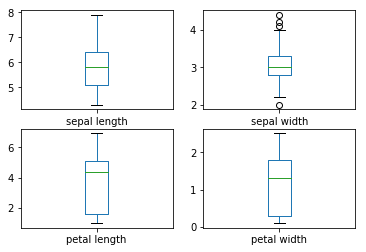

In [10]:
# Data Visualization
# Two types of visualization 
# Univariate plot - plot to describe each feature/field/variable individually
# Since the fields are numeric, we can create box and whisker plots
df.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

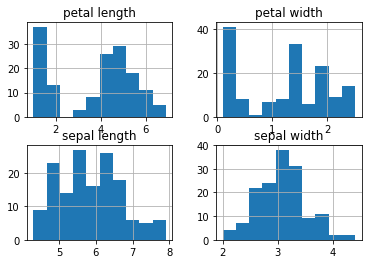

In [11]:
#histograms
df.hist()
plt.show()

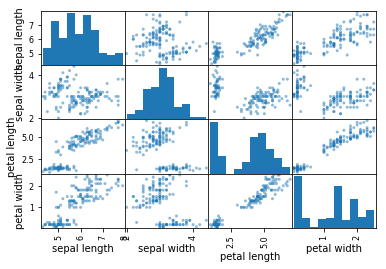

In [12]:
# Multivariate plots
# look at the interactions between the variables
# First, let’s look at scatterplots of all pairs of attributes. 
# This can be helpful to spot structured relationships between input variables.
# scatter plot matrix
scatter_matrix(df)
plt.show()
# Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

In [13]:
# Lets see the correllation thing
# first lets see df's categorical data
combined_data = pd.DataFrame()
combined_data=combined_data.append(df)
combined_data

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
combined_data_categorical=combined_data.select_dtypes(include='object')
combined_data_categorical

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
5,Iris-setosa
6,Iris-setosa
7,Iris-setosa
8,Iris-setosa
9,Iris-setosa


In [15]:
combined_data_other=combined_data.select_dtypes(exclude='object')
combined_data_other

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [16]:
import pandas_profiling
pfr1 = pandas_profiling.ProfileReport(combined_data_other)
pfr1

C:\Users\sunil\Anaconda3\envs\tensorflow_env\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use(BACKEND)


Number of variables,4
Number of observations,150
Total Missing (%),0.0%
Total size in memory,4.8 KiB
Average record size in memory,32.5 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [17]:
# Steps to create a machine learning model to predict a label given a sepal length, sepal width, petal length, petal width
# STEP: 1 - CREATE A VALIDATION SET
# We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that 
# we will hold back as a validation dataset.
# Split-out validation dataset
array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print("Training features:", X_train)
print("Validation features:", X_validation)
print("Training target:", Y_train)
print("Validation target:", Y_validation)

Training features: [[6.2 2.8 4.8 1.8]
 [5.7 2.6 3.5 1.0]
 [4.6 3.6 1.0 0.2]
 [6.9 3.1 5.4 2.1]
 [6.4 2.9 4.3 1.3]
 [4.8 3.0 1.4 0.3]
 [5.5 3.5 1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.1 3.5 1.4 0.3]
 [7.1 3.0 5.9 2.1]
 [6.7 3.3 5.7 2.1]
 [6.8 2.8 4.8 1.4]
 [6.4 2.8 5.6 2.2]
 [6.5 3.0 5.5 1.8]
 [5.7 3.0 4.2 1.2]
 [5.0 3.3 1.4 0.2]
 [6.7 3.1 4.4 1.4]
 [6.0 2.2 4.0 1.0]
 [6.4 2.7 5.3 1.9]
 [4.7 3.2 1.6 0.2]
 [4.6 3.1 1.5 0.2]
 [5.1 3.4 1.5 0.2]
 [7.7 3.8 6.7 2.2]
 [4.3 3.0 1.1 0.1]
 [6.3 3.3 6.0 2.5]
 [5.5 2.4 3.7 1.0]
 [5.0 2.0 3.5 1.0]
 [6.5 2.8 4.6 1.5]
 [5.0 3.4 1.6 0.4]
 [4.4 2.9 1.4 0.2]
 [5.0 3.5 1.6 0.6]
 [6.7 3.1 4.7 1.5]
 [7.3 2.9 6.3 1.8]
 [5.5 2.6 4.4 1.2]
 [5.2 2.7 3.9 1.4]
 [5.7 4.4 1.5 0.4]
 [7.2 3.2 6.0 1.8]
 [5.4 3.4 1.7 0.2]
 [5.8 4.0 1.2 0.2]
 [6.1 2.6 5.6 1.4]
 [5.7 2.5 5.0 2.0]
 [4.8 3.0 1.4 0.1]
 [6.5 3.0 5.8 2.2]
 [4.6 3.2 1.4 0.2]
 [6.6 2.9 4.6 1.3]
 [6.7 3.0 5.2 2.3]
 [6.1 3.0 4.6 1.4]
 [5.7 3.8 1.7 0.3]
 [7.0 3.2 4.7 1.4]
 [4.7 3.2 1.3 0.2]
 [6.5 3.0 5.2 2.0]
 [7.7 2.6 6.

In [18]:
# STEP 2 - TEST HARNESS
# We will use 10-fold cross validation to estimate accuracy.
# This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [19]:
# STEP 3 - SPOT CHECK Algorithms
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


C:\Users\sunil\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sunil\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sunil\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sunil\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sunil\Anaconda3\e

In [20]:
results

[array([1.        , 1.        , 0.91666667, 1.        , 1.        ,
        1.        , 0.91666667, 0.91666667, 0.91666667, 1.        ]),
 array([1.        , 1.        , 1.        , 0.91666667, 1.        ,
        1.        , 0.91666667, 1.        , 0.91666667, 1.        ]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.91666667, 1.        , 1.        , 0.91666667]),
 array([1.        , 1.        , 1.        , 0.91666667, 1.        ,
        1.        , 0.91666667, 1.        , 0.91666667, 1.        ]),
 array([1.        , 1.        , 1.        , 0.91666667, 1.        ,
        1.        , 1.        , 1.        , 0.83333333, 1.        ]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.91666667, 1.        , 1.        , 1.        ])]

<function matplotlib.pyplot.show(*args, **kw)>

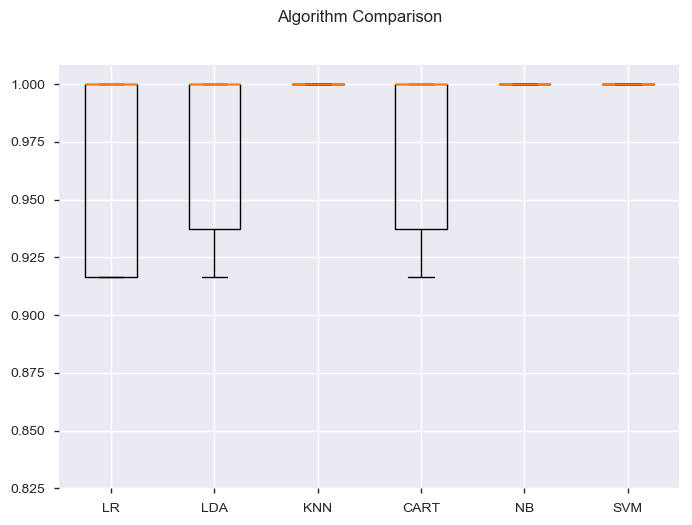

In [30]:
# STEP 4- COMPARING ALGORITHMS
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
#ax.grid(True)
#plt.boxplot(results,boxprops= dict(linewidth=1.0, color='black')
#, whiskerprops=dict(linestyle='-',linewidth=1.0, color='black'))
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show
#matplotlib.getbackend()

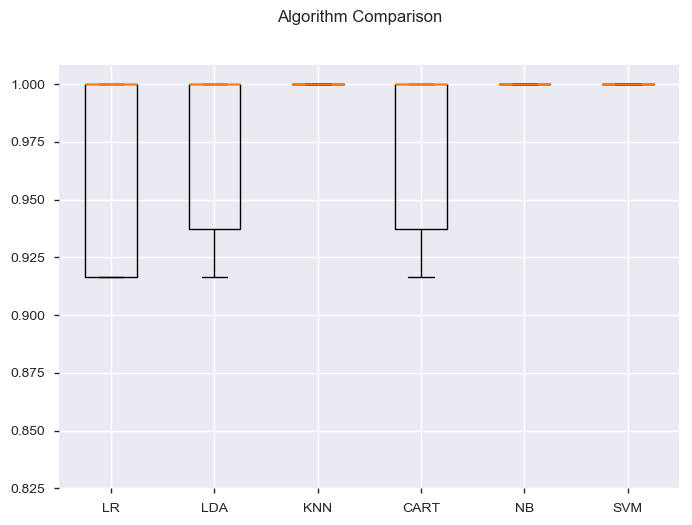

In [31]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [32]:
# STEP 5 - MAKING PREDICTIONS
# Lets run predictions on the validation set in each models one by one. 
# First lets run on KNN model
# Make predictions on validation dataset with kNN model
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [33]:
# Lets run on LR model
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictionsLR = lr.predict(X_validation)
print(accuracy_score(Y_validation, predictionsLR))
print(confusion_matrix(Y_validation, predictionsLR))
print(classification_report(Y_validation, predictionsLR))

0.8
[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.58      0.70        12
 Iris-virginica       0.67      0.91      0.77        11

      micro avg       0.80      0.80      0.80        30
      macro avg       0.85      0.83      0.82        30
   weighted avg       0.83      0.80      0.80        30



C:\Users\sunil\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sunil\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [34]:
# Lets run on LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictionsLDA = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictionsLDA))
print(confusion_matrix(Y_validation, predictionsLDA))
print(classification_report(Y_validation, predictionsLDA))

0.9666666666666667
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

      micro avg       0.97      0.97      0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [42]:
# Lets run on CART model
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictionsCART = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictionsCART))
print(confusion_matrix(Y_validation, predictionsCART))
print(classification_report(Y_validation, predictionsCART))

0.9
[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [40]:
# Lets run on NB model
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictionsNB = nb.predict(X_validation)
print(accuracy_score(Y_validation, predictionsNB))
print(confusion_matrix(Y_validation, predictionsNB))
print(classification_report(Y_validation, predictionsNB))

0.8333333333333334
[[7 0 0]
 [0 9 3]
 [0 2 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

      micro avg       0.83      0.83      0.83        30
      macro avg       0.86      0.86      0.86        30
   weighted avg       0.84      0.83      0.83        30



In [41]:
    # Lets run on SVM model
    svm = SVC()
    svm.fit(X_train, Y_train)
    predictionsSVM = svm.predict(X_validation)
    print(accuracy_score(Y_validation, predictionsSVM))
    print(confusion_matrix(Y_validation, predictionsSVM))
    print(classification_report(Y_validation, predictionsSVM))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

      micro avg       0.93      0.93      0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



C:\Users\sunil\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
